In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.05G/1.06G [00:07<00:00, 227MB/s]
100% 1.06G/1.06G [00:07<00:00, 156MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from  tensorflow import keras
from keras import Sequential
from keras import regularizers
from keras.callbacks import EarlyStopping
from keras.layers import Dense ,Conv2D , MaxPooling2D, Flatten, BatchNormalization, Dropout
from keras.regularizers import l2

In [ ]:
train_ds=keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)
validation_ds=keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
#Normalization
def process (image, label):
  image=tf.cast(image/255., tf.float32)
  return image, label
  train_ds=train_ds.map(process)
  validation_ds-=validation_ds.map(process)

In [ ]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3), kernel_regularizer=l2(.01)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(256,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))


model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_72 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_67 (Bat  (None, 254, 254, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_70 (MaxPoolin  (None, 127, 127, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_73 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_68 (Bat  (None, 125, 125, 64)     256       
 chNormalization)                                                
                                                     

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 77s 114ms/step - loss: 1.0544 - accuracy: 0.5980 - val_loss: 0.6533 - val_accuracy: 0.6570
Epoch 2/10
625/625 [==============================] - 72s 114ms/step - loss: 0.5972 - accuracy: 0.7118 - val_loss: 0.6715 - val_accuracy: 0.6960
Epoch 3/10
625/625 [==============================] - 70s 111ms/step - loss: 0.4956 - accuracy: 0.7839 - val_loss: 0.5351 - val_accuracy: 0.7592
Epoch 4/10
625/625 [==============================] - 70s 112ms/step - loss: 0.4053 - accuracy: 0.8335 - val_loss: 1.0110 - val_accuracy: 0.6090
Epoch 5/10
625/625 [==============================] - 70s 111ms/step - loss: 0.3173 - accuracy: 0.8766 - val_loss: 0.5006 - val_accuracy: 0.8216
Epoch 6/10
625/625 [==============================] - 72s 114ms/step - loss: 0.2364 - accuracy: 0.9137 - val_loss: 0.4763 - val_accuracy: 0.8446
Epoch 7/10
625/625 [==============================] - 70s 111ms/step - loss: 0.1625 - accuracy: 0.9464 - val_loss: 0.3743 - val_ac

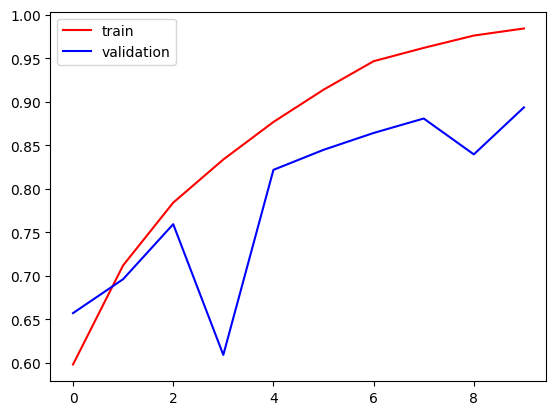

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

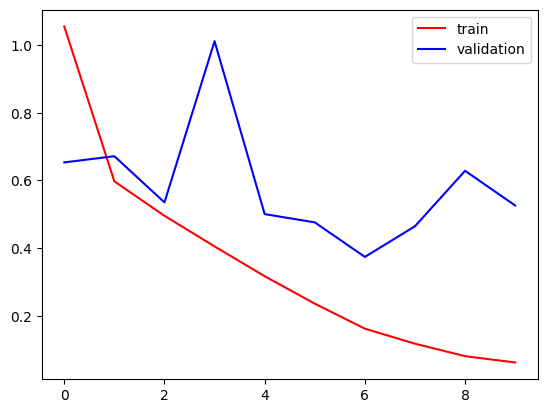

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.show()

In [ ]:
import cv2

In [ ]:
test_img = cv2.imread('/content/cat2.jpg')

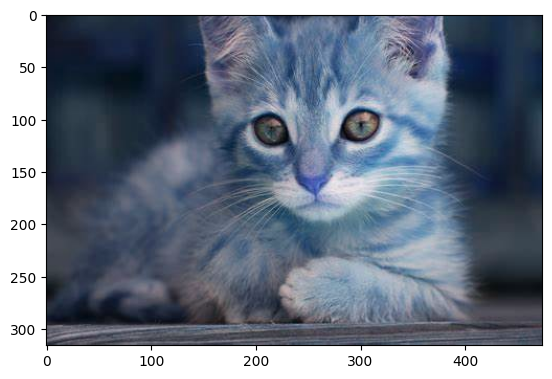

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape


(316, 474, 3)

In [ ]:
test_img=cv2.resize(test_img, (256, 256))

In [ ]:
test_input=test_img.reshape(1, 256, 256, 3)

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 130ms/step


array([[0.00270112]], dtype=float32)

In [ ]:

test_img3=cv2.imread('/content/dog.jpg')


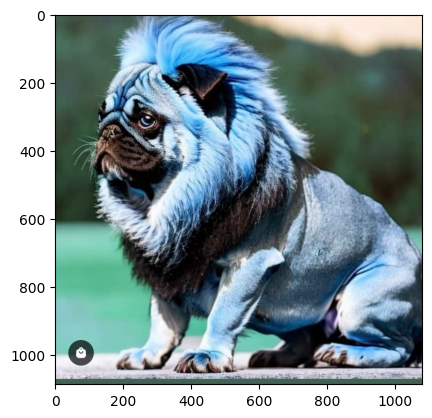

In [ ]:
plt.imshow(test_img3)

In [ ]:
test_img3=cv2.resize(test_img3, (256, 256))

In [ ]:
input_img3=test_img3.reshape(1, 256, 256, 3)

In [ ]:
model.predict(input_img3)

1/1 [==============================] - 0s 24ms/step


array([[0.99754107]], dtype=float32)

In [ ]:
test_img2=cv2.imread('/content/dog2.jpg')

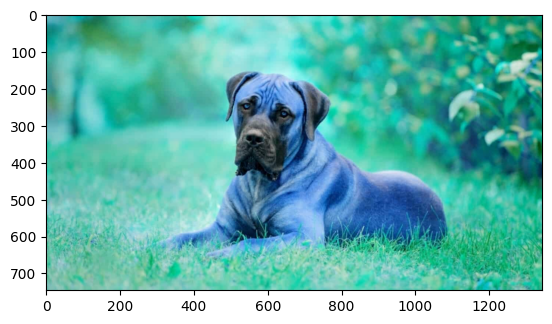

In [ ]:
plt.imshow(test_img2)

In [ ]:
test_img2.shape

(746, 1344, 3)

In [ ]:
test_img2=cv2.resize(test_img2, (256,256))

In [ ]:
input_img2=test_img2.reshape(1, 256, 256, 3)

In [ ]:
model.predict(input_img2)

1/1 [==============================] - 0s 20ms/step


array([[0.612463]], dtype=float32)